# Diabetes Prediction Report

## Imports

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import warnings
warnings.filterwarnings("ignore")

## Acquire 
- data set from kaggle
    - https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
- 100,000 rows
- Each row represents a patient

In [2]:
# Get the raw data
df = w.get_data()

## Prepare
- removed 3854 duplicates 
- dropped ages < 1 
- turned age data type from float to integer
- changed target name 'diabetes' to 'diabetic'
- dropped gender type of 'other' which only had 18 instances 
- created age_bin column to group ages repersents as:
    - 1 - 18
    - 19 - 29
    - 30 - 39
    - 40 - 49
    - 50 - 59
    - 60 -  69
    - 70+
- created bmi_class column repersented by a number as:
    1. Underweight: BMI < 18.5 kg/m²
    2. Normal weight: BMI 18.5-24.9 kg/m²
    3. Overweight: BMI 25-29.9 kg/m²(3)
    4. Obesity class I: BMI 30-34.9 kg/m²
    5. Obesity class II: BMI 35-39.9 kg/m²
    6. Obesity class III: BMI ≥ 40 kg/m²
- Split into Train, Validate, & Test
    - approximately 56/24/20 split
    


In [3]:
# get prepped data
df = w.prep_data()

In [4]:
# First 5 rows of the data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin,bmi_class
0,Female,80,0,1,never,25.19,6.6,140,0,7,3
1,Female,54,0,0,No Info,27.32,6.6,80,0,5,3
2,Male,28,0,0,never,27.32,5.7,158,0,2,3
3,Female,36,0,0,current,23.45,5.0,155,0,3,2
4,Male,76,1,1,current,20.14,4.8,155,0,7,2


<!DOCTYPE html>
<html>
  <head>
    <style>
      table, th, td {
        border: 1px solid black;
        padding: 5px;
      }
    </style>
  </head>
  <body>
    <h2>Diabetes Data Dictionary</h2>
    <table>
      <tr>
        <th>Feature</th>
        <th>Data Type</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>gender</td>
        <td>Categorical</td>
        <td>The gender of the patient (Male/Female)</td>
      </tr>
      <tr>
        <td>age</td>
        <td>Numeric</td>
        <td>The age of the patient in years</td>
      </tr>
      <tr>
        <td>hypertension</td>
        <td>Categorical</td>
        <td>Whether or not the patient has hypertension (Yes "1" /No "0")</td>
      </tr>
      <tr>
        <td>heart_disease</td>
        <td>Categorical</td>
        <td>Whether or not the patient has a history of heart disease (Yes "1" /No "0")</td>
      </tr>
      <tr>
        <td>smoking_history</td>
        <td>Categorical</td>
        <td>Whether or not the patient has a history of smoking (Yes "1" /No "0")</td>
      </tr>
      <tr>
        <td>bmi</td>
        <td>Numeric</td>
        <td>The body mass index of the patient, calculated as weight in kilograms divided by height in meters squared</td>
      </tr>
      <tr>
        <td>HbA1c_level</td>
        <td>Numeric</td>
        <td>The level of HbA1c, a measure of average blood glucose levels over the past 2-3 months</td>
      </tr>
      <tr>
        <td>blood_glucose_level</td>
        <td>Numeric</td>
        <td>The current level of glucose in the patient's blood, measured in milligrams per deciliter (mg/dL)</td>
      </tr>
      <tr>
        <td>diabetic</td>
        <td>Categorical</td>
        <td>Whether or not the patient has diabetes (Yes "1" /No "0")</td>
      </tr>
    </table>
  </body>
</html>


### Train, validate, Test split

In [5]:
#split the data into train, val, test
train, val, test = w.train_validate_test(df, 'diabetic')

In [6]:
# Show the split numbers
train.shape, val.shape, test.shape

((53321, 11), (22853, 11), (19044, 11))

### Explore

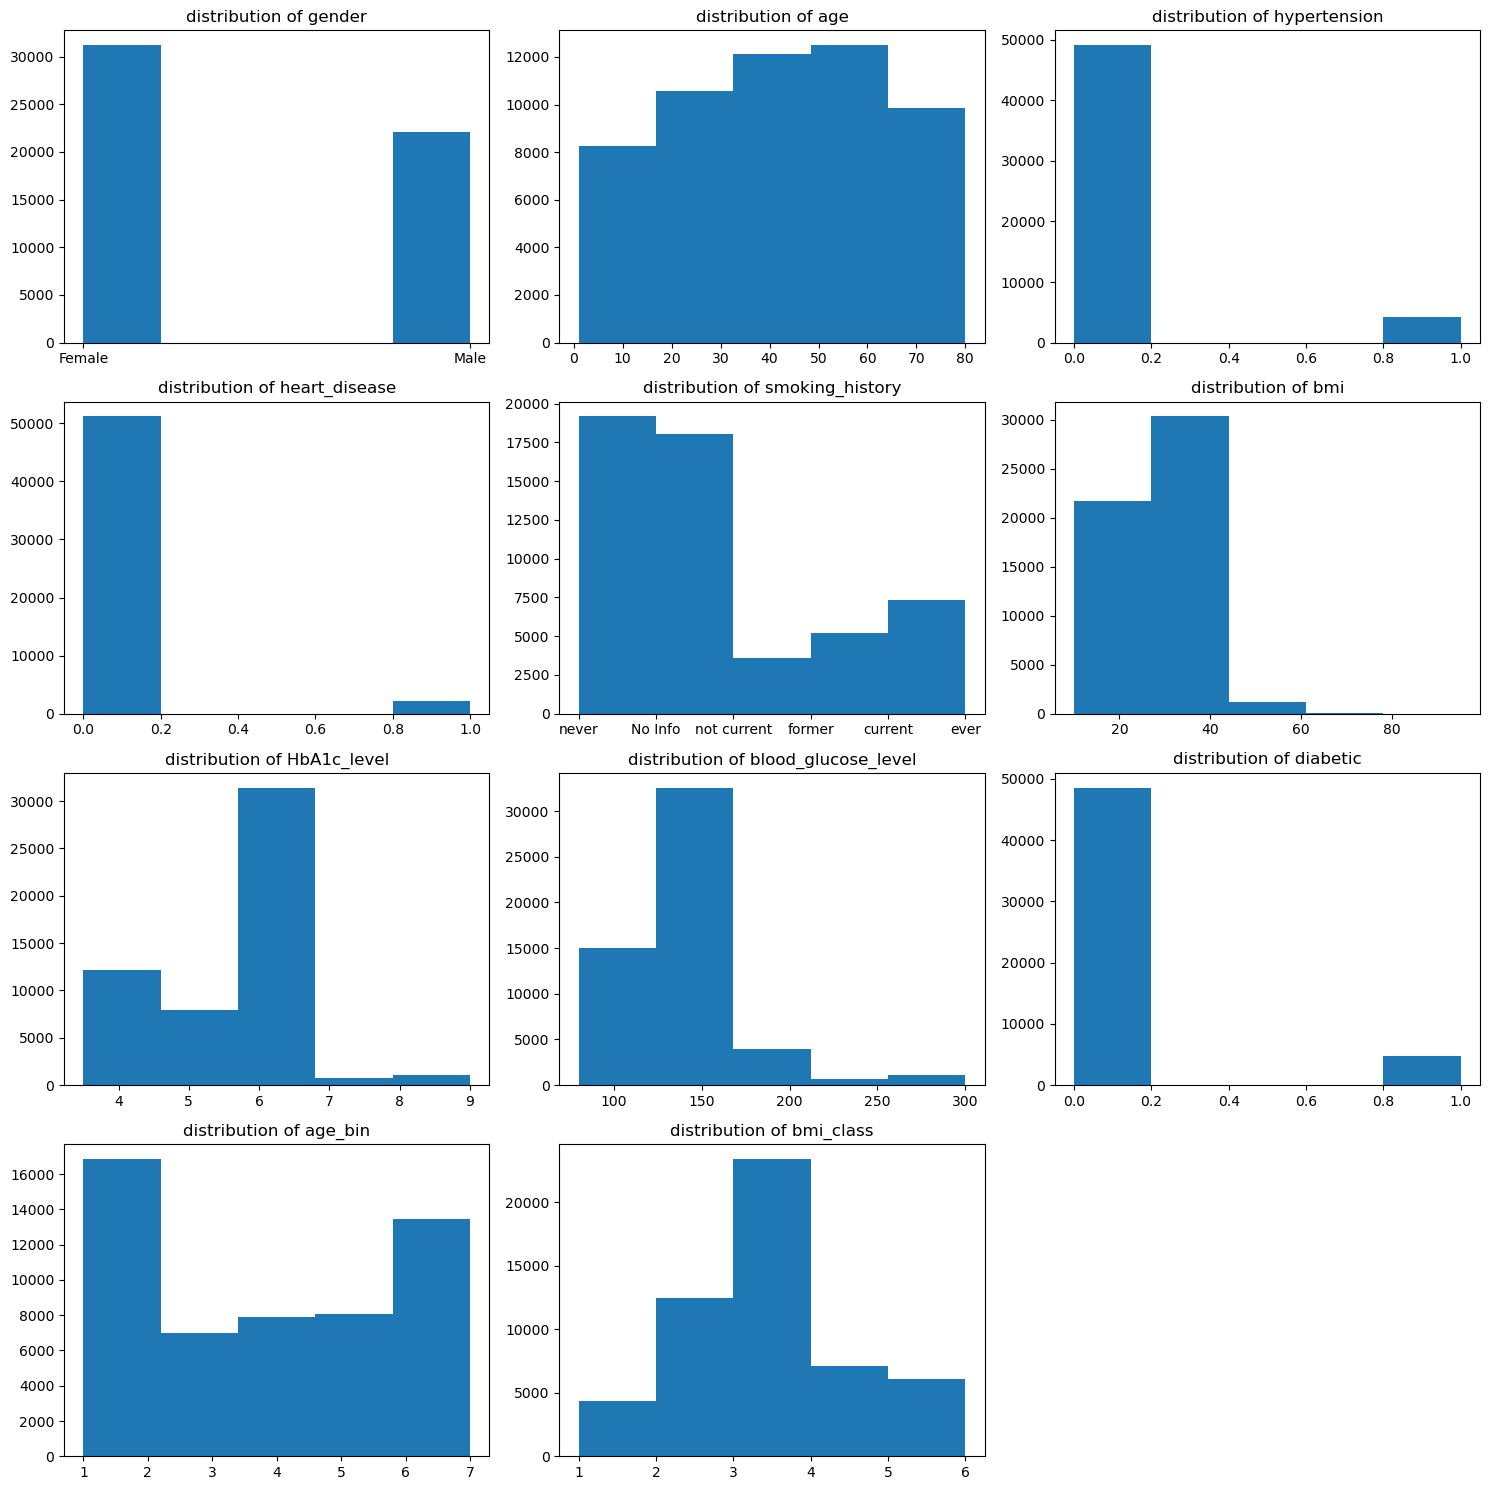

In [7]:
# get the distributions of each column
w.get_distributions(train)

### Q1 Does age play a role in diabetes?

#### H$o$: There is no role that age playes in diabetes
#### H$a$: Age does play a role in diabetes

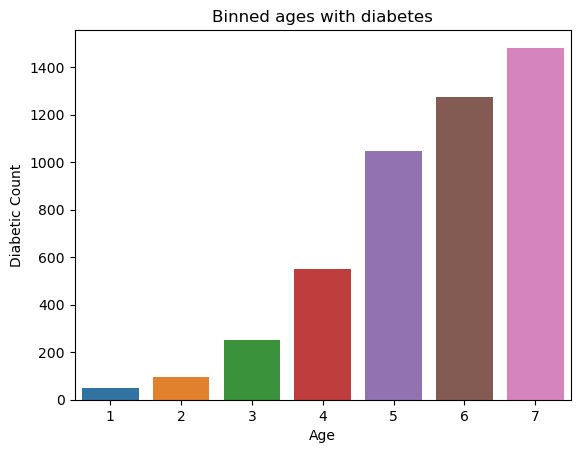

In [8]:
# get visual 
w.get_age_vis(train)

In [9]:
# Do stats test
w.test_age(train)

We can reject our null hypothesis: 0.0 < 0.05


- Since diabetic and age_bins are categorical a chisquared test is used
- The p_value is less than alpha(0.05) we can reject the null hypothesis


### Q2  How is A1C affecting the target?

#### H$o$: Higher A1c does not signify diabetes
#### H$a$: Having a higher A1c is a sign of diabetes

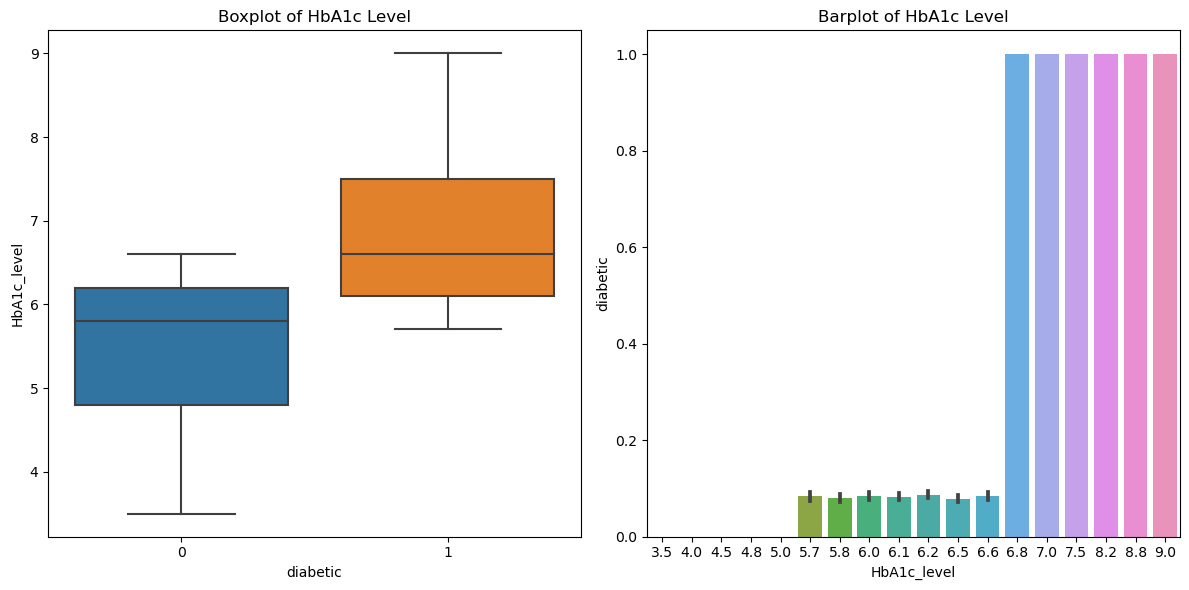

In [10]:
# Get visuals 
w.get_A1c_vis(train)

- diabetics have a higher average a1c than non diabetics
- 6.5 to 7.5 range for those who are and a meadian at about 6.7
- 4.8 to 6.2 for those how aren't  and a meadian at about 5.8
- average for diabetic is 6.9
- average for non diabetic is 5.4
- Will do a one sample ttest 

In [11]:
# Do stats test
w.A1c_stattest(train)

Ttest_1sampResult(statistic=90.18690588786937, pvalue=0.0)

- The null hypothesis is rejected with p_value of 0.00

### Q3 Is BMI a significant indicator of diabetes?

#### H$o$: Higher BMI does not contribute to more diabetes cases
#### H$a$: Higher BMI does contribute to more diabetes cases

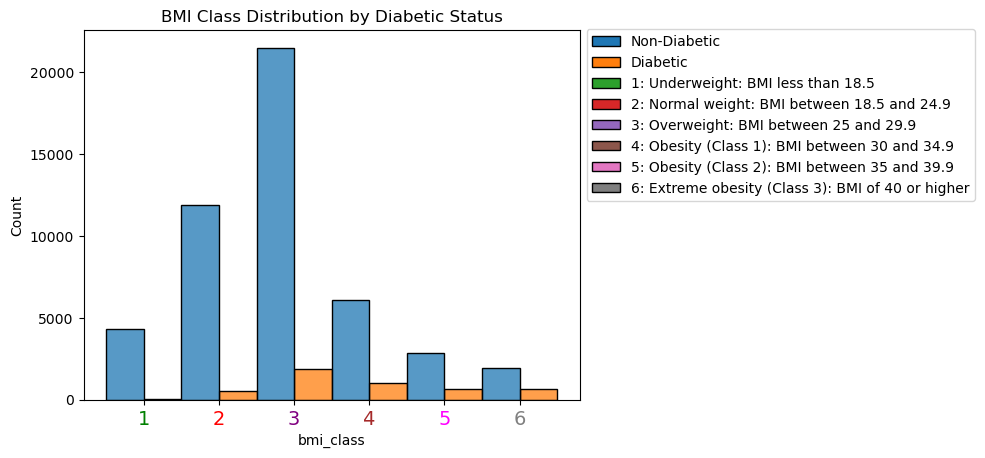

In [12]:
# Get bmi visual
w.get_bmi_vis(train)

In [13]:
# Get the stats test 
w.get_bmistats(train)

We can reject our null hypothesis: 0.0 < 0.05


- stats test for independence 
- alpha is 0.05
- we can reject our null hypothesis

## Exploration Summary
- Age, A1c, and BMI had the biggest impact on the target
- As age increases do do the number of diabetic cases
- As A1c gets out of  range(5.7 - 6.2) more diabetic cases there are.
- For Blood Glucose (BG) level I decided not to use it because of the lack of context behind the number.
    1. Did the patient just eat and/or what did they eat?
    2. Was this after an eight hour fasting (sleep)? 
    3. Was this number the last check from a two hour glucose tollerance test? 
- Without having the  answer from questions like those make this column pretty irrelivant.
- Will note that using the BG level feature will increase the model's accuracy but I deduce that's becasue the dataset is skewed towards using that number.

## Scale the data

In [14]:
# Scale train, val, and test
train_scaled, val_scaled, test_scaled = w.scale_data(train, val, test)

In [15]:
train_scaled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin,bmi_class
7299,Female,77,0,0,never,25.60,0.563636,90,0,7,3
76197,Female,15,0,0,No Info,20.22,0.490909,140,0,1,2
19159,Male,76,1,0,No Info,27.32,0.400000,90,0,7,3
68892,Female,16,0,0,never,29.07,0.181818,155,0,1,3
49924,Female,40,0,0,not current,31.79,0.454545,100,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
3655,Female,51,0,0,never,23.98,0.418182,130,0,5,2
55255,Male,62,1,0,former,27.32,0.418182,200,1,6,3
91372,Male,26,0,0,never,34.44,0.000000,159,0,2,4
78876,Female,26,0,0,former,26.50,0.545455,158,0,2,3


## Modeling

In [16]:
#Let's get the x and y for the train, val, test
x_train, y_train, x_val, y_val, x_test, y_test = w.get_target_and_features(train_scaled, val_scaled, test_scaled)

In [17]:
x_train

,HbA1c_level,age_bin,bmi_class
7299,0.563636,7,3
76197,0.490909,1,2
19159,0.400000,7,3
68892,0.181818,1,3
49924,0.454545,4,4
...,...,...,...
3655,0.418182,5,2
55255,0.418182,6,3
91372,0.000000,2,4
78876,0.545455,2,3


### Baseline Accuracy

In [18]:
baseline_accuracy = round((train.diabetic == 0).mean(), 2)
baseline_accuracy 

0.91

## Decision Tree

In [19]:
w.get_decisionTree_model(x_train, y_train, x_val, y_val,x_test, y_test, 9)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48571
           1       0.98      0.47      0.64      4750

    accuracy                           0.95     53321
   macro avg       0.97      0.73      0.81     53321
weighted avg       0.95      0.95      0.94     53321

Accuracy of Random Tree classifier on training set: 0.95
Accuracy of Random Tree classifier on validation set: 0.95


### Random Forrest

In [24]:
w.get_random_forest(train, x_train, y_train, x_val, y_val)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48571
           1       1.00      0.46      0.63      4750

    accuracy                           0.95     53321
   macro avg       0.97      0.73      0.80     53321
weighted avg       0.95      0.95      0.94     53321



,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,model_preds,difference,baseline_accuracy
85,7,9,0.952101,0.952348,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.000246,0.91


## Logistical Regression

In [21]:
w.get_logReg_model(x_train, y_train, x_val, y_val)

Accuracy of Logistic Regression classifier on training set: 0.94
Accuracy of Logistic Regression classifier on validation set: 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     48571
           1       0.86      0.43      0.58      4750

    accuracy                           0.94     53321
   macro avg       0.90      0.71      0.77     53321
weighted avg       0.94      0.94      0.93     53321



## KNN

In [22]:
w.get_knn(x_train, y_train, x_val, y_val)

Accuracy of Logistic Regression classifier on training set: 0.95
Accuracy of Logistic Regression classifier on validation set: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     20817
           1       0.91      0.48      0.63      2036

    accuracy                           0.95     22853
   macro avg       0.93      0.74      0.80     22853
weighted avg       0.95      0.95      0.94     22853



## Model Summary
- All Models better than baseline 
- Decision Tree and KNN were the best models
- Looking at all the metrics overall knn has best recall but an 7% difference with the decision tree on precision
- Not willing to sacraifice that much for just a 1% increase on recall
- Going to run test on the Decision Tree

## Model predictions with Test data

In [23]:
w.get_decisionTree_model(x_train, y_train, x_val, y_val,x_test, y_test, 9, t=1)

Accuracy of logistic regression classifier on test set: 0.95


## Conclusions

### Exploration 
- Effective drivers for predicting diabetics are:
    - HbA1c_level
    - Age
    - BMI
- Will note that using the BG level feature will increase the model's accuracy by 3% and recall by 20% 




### Modeling 
- All models did better than the baseline of 91%
#### Best models
- Decision Tree
    - For target diabetic
        - 95% Accuracy
        - 98% Precision 
        - 47% Recall
- KNN
    - For target diabetic
        - 95% Accuracy
        - 91% Precision
        - 48% Recall

## Next Steps
- Moving forward with this project I would drop this dataset and look to acquire a better dataset. Also I would research ever column/feature more thoroughly. 
  